[![AnalyticsDojo](https://s3.amazonaws.com/analyticsdojo/logo/final-logo.png)](http://www.analyticsdojo.com)
<center><h1>Introduction to Python - Introduction to Pandas</h1></center>
<center><h3><a href = 'http://www.analyticsdojo.com'>www.analyticsdojo.com</a></h3></center>



### Links: [local](http://localhost:8888/notebooks/classes/02-intro-python/intro-python-pandas.ipynb) [github](https://github.com/AnalyticsDojo/materials/blob/master/analyticsdojo/classes/02-intro-python/intro-python-pandas.ipynb) [slides](http://nbviewer.jupyter.org/format/slides/github/AnalyticsDojo/materials/blob/master/analyticsdojo/classes/02-intro-python/intro-python-pandas.ipynb#/)

#### Large sections of this were adopted from Analysing structured data with Pandas by [Steve Phelps](http://sphelps.net).  Thanks Steve!


## Data frames

- The `pandas` module provides a powerful data-structure called a data frame.

- It is similar, but not identical to:
    - a table in a relational database,
    - an Excel spreadsheet,
    - a dataframe in R.

    

## Data frames
- Data frames can be used to represent:
    - Data with columns of different types (numeric, text, boolean etc.)
    - [Time series](https://en.wikipedia.org/wiki/Time_series) data
    - [Relational data](https://en.wikipedia.org/wiki/Relational_model)
    

## Data frames
- Data frames can be read and written to/from:
    - database queries, database tables
    - CSV files
    - json files
    - etc.
    
- Beware that data frames are memory resident;
    - If you read a large amount of data your PC might crash
    - With big data, typically you would read a subset or summary of the data via e.g. a select statement.

# Importing pandas

- The pandas module is usually imported with the alias `pd`.


In [1]:
import pandas as pd

# Pandas (like the rest of Python) is object-oriented

- Pandas is object-oriented.

- We create data frames by constructing instances of different classes.

- The two most important classes are:

    - `DataFrame`
    - `Series`
    
- Pandas follows the Java convention of starting the name of classes with an upper-case letter, whereas instances are all lower-case.


In [3]:
data = [1,2,3,4,5]
my_series = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])
my_series

a    1
b    2
c    3
d    4
e    5
dtype: int64

# Plotting a Series

- We can plot a series by invoking the `plot()` method on an instance of a `Series` object.

- The x-axis will autimatically be labelled with the series index.

- This is the first time we are invoking a `magic` command. Read more about them [here](http://ipython.readthedocs.io/en/stable/interactive/magics.html). 

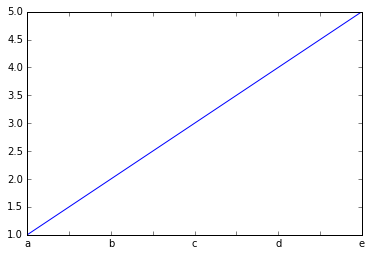

In [4]:
%matplotlib inline
my_series.plot()

# Creating a series with automatic index

- In the following example the index is creating automatically:

In [5]:
pd.Series(data)

0    1
1    2
2    3
3    4
4    5
dtype: int64

# Creating a Series from a `dict`



In [6]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
my_series = pd.Series(d)
my_series

a    0.0
b    1.0
c    2.0
dtype: float64

# Indexing/Slicing a Series with `[]`

- Series can be accessed using the same syntax as arrays and dicts.
- We use the labels in the index to access each element.
- We can also use the label like an attribute `my_series.b`
- We can specify a range with `my_series[['b', 'c']]`



In [7]:
print( my_series['b'],'\n', my_series.b, '\n', my_series[['b', 'c']])

1.0 
 1.0 
 b    1.0
c    2.0
dtype: float64


## Functions on Series

- We can perform calculations using the entire series similar to numpy.
- Methods are called from within `np.Series`, for example np.Series.add
- See a variety of series functions [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) 



In [8]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
a = pd.Series(d)
b1=10*a
b2=a.multiply(10)
c1=a+b1
c2=pd.Series.add(a,b1) #Note we are calling the method of the series class. Numpy used us np.add
f=a**2  #This squares the value. 

x = pd.Series({'a' : 0., 'b' : 1., 'c' : 2.})
y = pd.Series({'a' : 3., 'b' : 4., 'c' : 5.})
z = x+y

print('Print the entire array a:', a)
print('Print the entire array b1:', b1)
print('Print the entire array b2:', b2)
print('Print the entire array b3:', c1)
print('Print the entire array c2:', c2)
print('Print the entire array f:', f)
print('Print the entire array a:', z)

Print the entire array a: a    0.0
b    1.0
c    2.0
dtype: float64
Print the entire array b1: a     0.0
b    10.0
c    20.0
dtype: float64
Print the entire array b2: a     0.0
b    10.0
c    20.0
dtype: float64
Print the entire array b3: a     0.0
b    11.0
c    22.0
dtype: float64
Print the entire array c2: a     0.0
b    11.0
c    22.0
dtype: float64
Print the entire array f: a    0.0
b    1.0
c    4.0
dtype: float64
Print the entire array a: a    3.0
b    5.0
c    7.0
dtype: float64


## Time Series
- Time series models link specific times with rows.

In [9]:
dates = pd.date_range('1/1/2000', periods=5)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [10]:
time_series = pd.Series(data, index=dates)
time_series

2000-01-01    1
2000-01-02    2
2000-01-03    3
2000-01-04    4
2000-01-05    5
Freq: D, dtype: int64

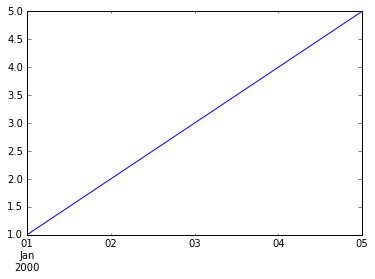

In [11]:
ax = time_series.plot()

## Missing Values

- Pandas uses `nan` to represent missing, invalid or unknown data values.

- It is important to note that this only convention only applies within pandas.


# DataFrame

- A data frame has multiple columns, each of which can hold a *different* type of value.

- Like a series, it has an index which provides a label for each and every row. 

- Data frames can be constructed from:
    - dict of arrays,
    - dict of lists,
    - dict of dict
    - dict of Series
    - 2-dimensional array
    - a single Series
    - another DataFrame


## Example: Creating a DataFrame from Multiple Series
- Notice how it handles the missing values as `NaN`
- Series should have matching keys for each matching row.

In [83]:
d = {
        'x' : 
            pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'y' : 
            pd.Series([4.,  6., 7.], index=['a',  'c', 'd']),
        'z' :
            pd.Series([0.2, 0.3, 0.4], index=[ 'b', 'c', 'd'])
}

df = pd.DataFrame(d)
print (df)

     x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4


# Plotting data frames

- When plotting a data frame, each column is plotted as its own series on the same graph.

- The column names are used to label each series.

- The row names (index) is used to label the x-axis.

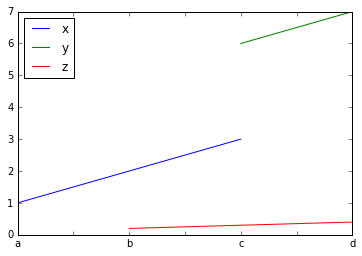

In [84]:
ax = df.plot()

In [86]:
df


,x,y,z
a,1.0,4.0,NaN
b,2.0,NaN,0.2
c,3.0,6.0,0.3
d,NaN,7.0,0.4


## Indexing/Slicing Rows of DataFrames
- Simple ways of selecting all rows (`df[:]`)
- Rows can be accessed via a key or a integer corresponding to the row number. 
- Omitting a value generally means *all values* before or after an item.
- When we retrieve a single or mulitiple rows, the result is a Dataframe.
- Read more [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

In [115]:
#This selects specific rows
srows0 = df[:]     #This will show all rows, all columns
srows1 = df[0:1]     #This will show only row 1 and all columns
srows1b = df[:3]     #This will all up to and including row 3.
srows1c = df[2:]     #This will all up to and including row 3.
srows2 = df[:'c']    #This will show all rows up to and including 'c' and all columns
srows3 = df['b':]    #This will show all rows after and including 'b' and all columns
srows4 = df['c':'d'] #This will show row c and d and all columns

print('\n', srows0,'\n', srows1,'\n', srows1b,'\n', srows1c,'\n', srows2,'\n', srows3,'\n', srows4)



      x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4 
      x    y   z
a  1.0  4.0 NaN 
      x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3 
      x    y    z
c  3.0  6.0  0.3
d  NaN  7.0  0.4 
      x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3 
      x    y    z
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4 
      x    y    z
c  3.0  6.0  0.3
d  NaN  7.0  0.4


## Indexing/Slicing Columns of DataFrames
- Simple ways of selecting colum(s) `frame[[colname(s)]]`. 
- Columns can have one (`df['x']`) or multiple (`df[['x', 'y']]`) columns.
- When specifying one column, one can use simplified dot notation `df.x`.
- When we include multiple columns the slice that result is a DataFrame.
- When we retrieve a single column, the result is a Series.
- When we retrieve mulitiple column, the result is a Dataframe.


In [102]:
#This selects columns in various ways.
scols1= df['x'] #this will list all rows of column 'x' and 'y'
scols2 = df[['x', 'y']] #this will list all rows of column 'x' and 'y'
scols3= df.z 
print('\n', scols1,'\n', scols2,'\n', scols3)



 a    1.0
b    2.0
c    3.0
d    NaN
Name: x, dtype: float64 
      x    y
a  1.0  4.0
b  2.0  NaN
c  3.0  6.0
d  NaN  7.0 
 a    NaN
b    0.2
c    0.3
d    0.4
Name: z, dtype: float64


## Indexing/Slicing Columns and Rows of DataFrames
- Can incorporate any combination of column and row syntax shown below with general syntax `df[columns][rows]`
- Can also utilize dot notation to specify a column and number of rows `df.column[rows]`



In [118]:
srowcols1 = df['x'][0:2]  # this selects one column and a range of rows 
srowcols2 = df['x'][:'c'] # this selects one column and a range of rows 
srowcols3 = df.x[0:2]
srowcols4 = df[['x','y']][:'c'] 
srowcols5 = df[['x','y']]['b':'c'] 
srowcols6 = df[['x','y']]['b':] 
print('\n', srowcols1,'\n', srowcols2,'\n',srowcols3, '\n', srowcols4,'\n', srowcols5,'\n', srowcols6)

a    1.0
b    2.0
Name: x, dtype: float64 
 a    1.0
b    2.0
c    3.0
Name: x, dtype: float64 
 a    1.0
b    2.0
Name: x, dtype: float64 
      x    y
a  1.0  4.0
b  2.0  NaN
c  3.0  6.0 
      x    y
b  2.0  NaN
c  3.0  6.0 
      x    y
b  2.0  NaN
c  3.0  6.0
d  NaN  7.0


## Indexing/Slicing Specific Values from DataFrames
- Simple ways of selecting via `df[column][row]`
- When we retrieve a single column, the result is a Series
- We can also specify a specific value with `df['x']['b']` or `df.x.b`
- The variable will be the class of the column

In [85]:
print(df['x']['b'], '\n', df.x.b,'\n', type(df.x.b))

b    2.0
c    3.0
Name: x, dtype: float64 
 2.0 
 2.0 
 <class 'numpy.float64'>


## Alternate Indexing/Slicing Columns and Rows of DataFrames with `iloc`
- An alternate that allows indexing via integers 
- For example, `df.iloc[rowstart:rowend, columnstart:columnend]`

In [128]:
siloc1 = df.iloc[0:1,0:2] #This will list row 0 and columns 0/1
siloc2 = df.iloc[0:3,1:3] #This will list row 0-2 and columns 1/2
print('\n', siloc1,'\n', siloc2)


      x    y
a  1.0  4.0 
      y    z
a  4.0  NaN
b  NaN  0.2
c  6.0  0.3


## Alternate Indexing/Slicing Columns and Rows of DataFrames with `loc`
- An alternate that allows indexing via labels 
- For example, `df.loc[rowlabelstart:rowlabelend, columnlabelstart:columnlabelend]`

In [166]:

sloc1=df.loc['a':'b','x':'y'] #This selects a range of labels.
sloc2=df.loc['a':'b',:'y'] #This selects row a-b and columns up to y.
sloc3=df.loc['a',['x','z']]  #This also allows us to select specific items, here row a and columns x and z.
sloc4=df.loc['b':,'y':]#This also allows us to select all rows after b and all columns after y.
sloc5=df.loc['a','x'] #This selects a single row/column.
print('\n', sloc1,'\n', sloc2,'\n', sloc3,'\n', sloc4,'\n', sloc5)


      x    y
a  1.0  4.0
b  2.0  NaN 
      x    y
a  1.0  4.0
b  2.0  NaN 
 x    1.0
z    NaN
Name: a, dtype: float64 
      y    z
b  NaN  0.2
c  6.0  0.3
d  7.0  0.4 
 1.0


# Intro to Filters (Logical indexing)

- We can use logical indexing to retrieve a subset of the data.
- We will do more with complex filters in the future.



In [158]:
# At the foundation of the filter is a boolean array based on some type of condition. 
df['x'] >= 2

a    False
b     True
c     True
d    False
Name: x, dtype: bool

In [19]:
#notice how the logical statement is inside the dataframe specification.  This creates an intermediate boolean array. 
df[df['x'] >= 2]

,x,y,z
b,2.0,NaN,0.2
c,3.0,6.0,0.3


In [23]:
#This is an alternate method where we first set the boolean array. 
included=df['x'] >= 2
df[included]


,x,y,z
b,2.0,NaN,0.2
c,3.0,6.0,0.3


## Functions and DataFrames

- We can do calculations and functions with dataframes just like series.
- To make a copy, don't set two dataframes equal us the `copy` method:  `df2= df.copy()` 

In [163]:
df2= df.copy()
print(df, '\n', df2)

     x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4 
      x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4


In [17]:
df ** 2 #This squares all values. 
print(df)

     x    y    z
a  1.0  4.0  NaN
b  2.0  NaN  0.2
c  3.0  6.0  0.3
d  NaN  7.0  0.4


In [16]:
z= df['x'] + df['y']
print(z,'\n', type(z))

a    5.0
b    NaN
c    9.0
d    NaN
dtype: float64 
 <class 'pandas.core.series.Series'>


## Summary statistics
- To quickly obtain summary statistics on numerical values use the `describe` method.
- You will get a warning if there are missing values.
- The result is itself a DataFrame, that we can slice `dfstats.y['mean']`.

In [159]:
dfstats=df.describe()
dfstats



/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,x,y,z
count,3.0,3.000000,3.0
mean,2.0,5.666667,0.3
std,1.0,1.527525,0.1
min,1.0,4.000000,0.2
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,3.0,7.000000,0.4


In [160]:
xmean = dfstats.x['mean'] #This is the X mean
ystd = dfstats['y']['std'] #This is the Y standardard deviation
print(xmean,'\n',ystd)

2.0 
 1.52752523165


# Accessing the row and column labels

- The row labels (index) can be accessed through `df.index`.
- The column labels can be accessed through `df.columns`.


In [32]:
df.index


Index(['a', 'b', 'c', 'd'], dtype='object')

In [33]:
df.columns

Index(['x', 'y', 'z'], dtype='object')

## Financial data

- Pandas was originally developed to analyse financial data.

- While Pandas used to have [built-in functions](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for retrieving data from Google, Yahoo Finance etc., it has recently been move to a package `pandas_datareader` that we have to install.

- The following example will retrieve the data for "GSK" from Yahoo Finance.
- Both [quant-econ.net](http://quant-econ.net) and [quantecon.org](http://quantecon.org) provide great resources for modeling economic data.


In [4]:
#You only need to run this once. 
!pip install pandas_datareader

  Running setup.py bdist_wheel for requests-file ... - \ done
  Stored in directory: /home/jovyan/.cache/pip/wheels/a4/4c/1c/8f22cae3cebc5e0b7da07bbf4feee223c2c86702e391c47df0
Successfully built requests-file


In [29]:


import pandas_datareader.data as pdr
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
#This retreives data regarding Ford (F) from yahoo from 1/1/2010 and 1/27/2013
gsk = pdr.DataReader('F', 'yahoo', start, end)


##  Large Dataframes - Head and Tail

- Many times you just want a sampling of the available data
- The `head()` command can view the start of a data frame.
- The `tail()` command can be used to show the end of a data frame. 

In [12]:
gsk.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,43.080002,43.130001,42.889999,42.970001,1046500,29.641702
2010-01-05,41.990002,42.080002,41.619999,41.830002,1619800,28.855304
2010-01-06,41.560001,41.700001,41.290001,41.340000,1850100,28.517289
2010-01-07,41.400002,41.549999,41.020000,41.480000,1762500,28.613864
2010-01-08,41.060001,41.160000,40.770000,41.099998,2952100,28.351730


In [14]:
gsk.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-01-18,44.029999,44.080002,43.750000,43.939999,1646900,35.581902
2013-01-22,44.810001,44.849998,44.439999,44.750000,4561000,36.237828
2013-01-23,44.910000,44.970001,44.689999,44.830002,2157600,36.302613
2013-01-24,44.880001,45.000000,44.790001,44.830002,2746300,36.302613
2013-01-25,44.980000,45.000000,44.590000,44.770000,2165100,36.254024


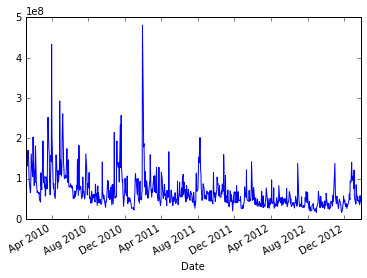

In [31]:
## Volume as a time series
%matplotlib inline
ax = gsk['Volume'].plot()

## Adjusted closing prices as a time series

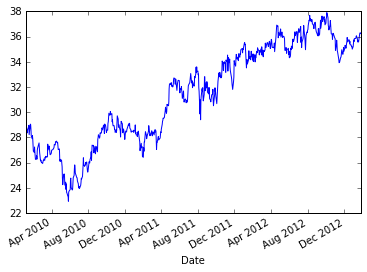

In [9]:
gsk['Adj Close'].plot()

In [27]:
## We can slice a range of dates
gsk['Adj Close']['1-1-2011':'1-1-2013']

Date
2011-01-03    28.548125
2011-01-04    28.991803
2011-01-05    28.322648
2011-01-06    28.402656
2011-01-07    28.199002
2011-01-10    28.199002
2011-01-11    28.075352
2011-01-12    28.388109
2011-01-13    28.279009
2011-01-14    28.497211
2011-01-18    27.769870
2011-01-19    27.646221
2011-01-20    26.947975
2011-01-21    27.166176
2011-01-24    27.529847
2011-01-25    27.173451
2011-01-26    27.275278
2011-01-27    27.246184
2011-01-28    26.475205
2011-01-31    26.424291
2011-02-01    27.195270
2011-02-02    26.897061
2011-02-03    27.646221
2011-02-04    27.646221
2011-02-07    28.460845
2011-02-08    28.359017
2011-02-09    28.274030
2011-02-10    28.177963
2011-02-11    27.897143
2011-02-14    28.259253
                ...    
2012-11-16    33.994727
2012-11-19    34.326738
2012-11-20    34.351031
2012-11-21    34.464403
2012-11-23    34.958368
2012-11-26    34.602065
2012-11-27    34.602065
2012-11-28    34.804511
2012-11-29    35.144621
2012-11-30    34.828803
2012-12-03 

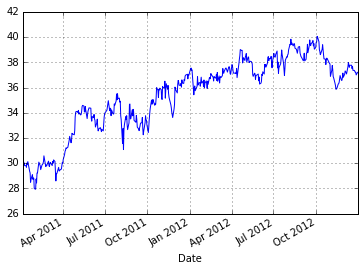

In [54]:
gsk['Adj Close']['1-1-2011':'1-1-2013'].plot()

- We can *resample* to obtain weekly prices

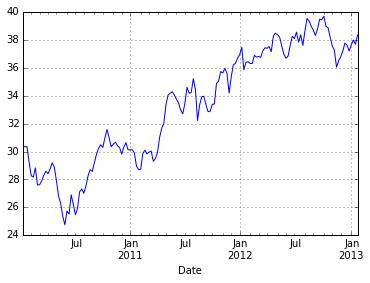

In [55]:
weekly_prices = gsk['Adj Close'].resample('1w')
weekly_prices.plot()

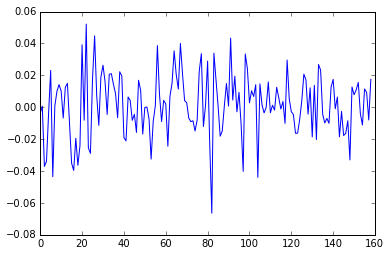

In [56]:
import matplotlib.pyplot as plt
weekly_rets = np.diff(np.log(weekly_prices))
plt.plot(weekly_rets)

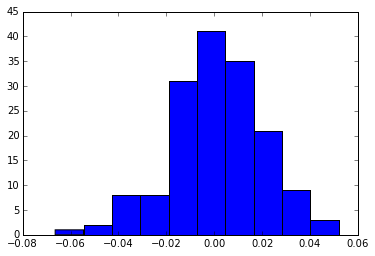

In [57]:
ax = plt.hist(weekly_rets)

## Loading Files with Pandas
- We used Pandas in an earlier notebook to load the iris data file.  
- Whenver you have a dataset with a variety of fields of various types, loading it into Pandas is a good strategy.
- You can load data from Azure, from a local file, or from a url.  







In [37]:
#If runing locally.
!pip install azureml

In [47]:
#If running this locally, one can fill in the workspace ID and token.
azureid='7b4c0c2835dd4ff8b734e4a562d4f7d0'
azuretoken='fa47cacf0890431682dd635450b734ca'
  
from azureml import Workspace
ws = Workspace(
    workspace_id=azureid,
    authorization_token=azuretoken,
    endpoint='https://studioapi.azureml.net'
)
ds = ws.datasets['Iris.csv']
frame = ds.to_dataframe()
frame.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
# Pulling from a local file
frame2 = pd.read_csv('../../data/iris.csv')
frame2.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
# Pulling from a url.  Notice that this is the raw version of the file.
frame3 = pd.read_csv("https://raw.githubusercontent.com/AnalyticsDojo/materials/master/analyticsdojo/data/Iris.csv")
frame3.head()


,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exercise-Pandas
1. Using, the Iris dataset, find the mean of the sepalLength and assign it to the `sepalLengthMean` variable using the dataframe returned from the describe command.   
2. Create a new dataframe `iristrain` that includes the first 75 rows of the iris dataframe.
3. Create a new dataframe `iristest` that includes the last 75 rows of the iris dataframe.
4. Create a new series `sepalLength` from the `sepalLength` column of the iris dataframe. 

## CREDITS

#### Large sections of this were adopted from Analysing structured data with Pandas by [Steve Phelps](http://sphelps.net).  Thanks Steve!


Copyright [AnalyticsDojo](http://www.analyticsdojo.com) 2016
This work is licensed under the [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/) license agreement.

